# MGFD25 Text Analysis example: 
## Analysing text from WallStreetBets

## Part 1: Harvesting text for analysis
#### We'll fetch the latest reddit threads from WallStreetBets 

First you'll need a Reddit Account:  [Register here](https://www.reddit.com/)

Follow the instructions [here](https://github.com/reddit-archive/reddit/wiki/OAuth2-Quick-Start-Example#first-steps) to obtain a 'client ID' and 'client scecret'.  This is your login and password.

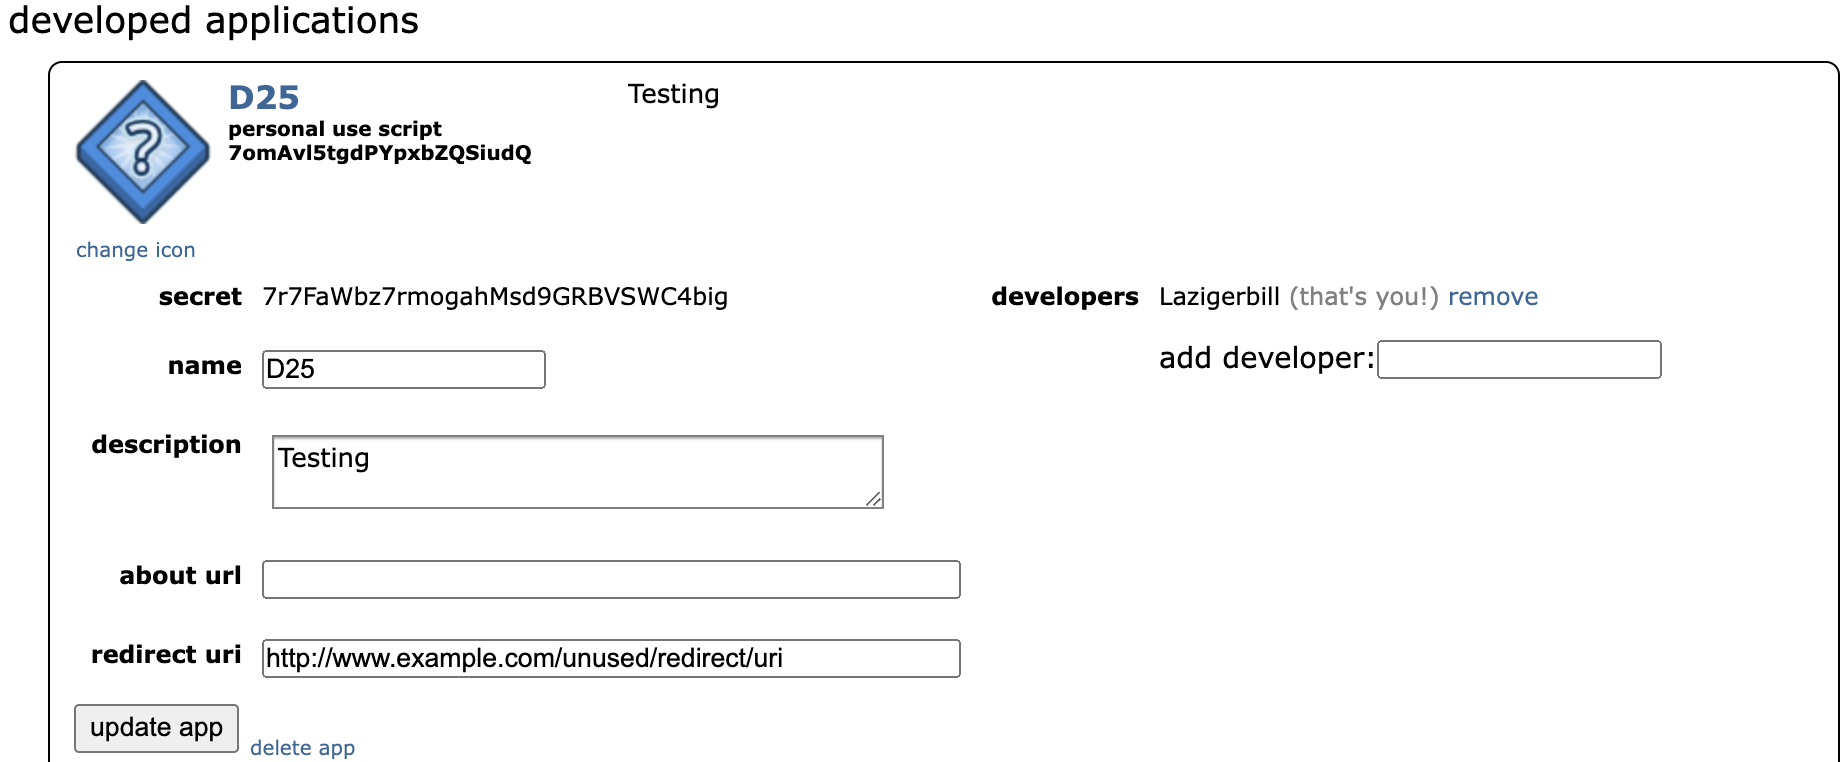

### Part 1a: PRAW: The Python Reddit API Wrapper
see full documentation [here](https://praw.readthedocs.io/en/stable/)

```pip install praw```


In [ ]:
import praw

reddit = praw.Reddit(
    client_id="7omAvl5tgdPYpxbZQSiudQ",
    client_secret="7r7FaWbz7rmogahMsd9GRBVSWC4big",
    user_agent="testscript by u/instructor",
)



We now have created a read-only Reddit instance.  With a read-only instance, we can access publicly available information, like obtaining 10 “hot” submissions from ```r/wallstreetbets```

In [ ]:
for submission in reddit.subreddit("wallstreetbets").hot(limit=10):
    print(submission.title)


### Part 1b: Extracting comments with PRAW

In [ ]:
# We first create a submission object
url = "https://www.reddit.com/r/wallstreetbets/comments/11e3ac2/daily_discussion_thread_for_february_28_2023/"
submission = reddit.submission(url=url)

In [ ]:
document=[]
submission.comments.replace_more(limit=5)
for top_level_comment in submission.comments:
        document.append(top_level_comment.body)

In [ ]:
document

In [ ]:
#Let's put this into a dataframe
author=[]
submission.comments.replace_more(limit=5)
for top_level_comment in submission.comments:
        author.append(top_level_comment.author)

import pandas as pd

df = pd.DataFrame(list(zip(author, document)),
               columns =['Author', 'Comment'])

In [ ]:
df

## Part 2: Text analysis
By analysing the harvested text, we are hoping to organize, understand and gain additional insights from it.
There are 4 major practice areas of Text Analytics:
+ Descriptive statistics
+ Document clustering
+ Document classification
+ Sentiment analysis

#### Definitions
+ **Character:** 
    + a minimal unit of information that has semantic meaning
    + E.g., letters (abcdef), numbers (12345), punctuation, whitespace
+ **String or Text:** 
    + a sequence of characters
+ **Document:** 
    + A string with business meaning
    + E.g., emails, blog posts, tweets, news articles, etc.
+ **Corpus:** 
    + A collection of documents
    
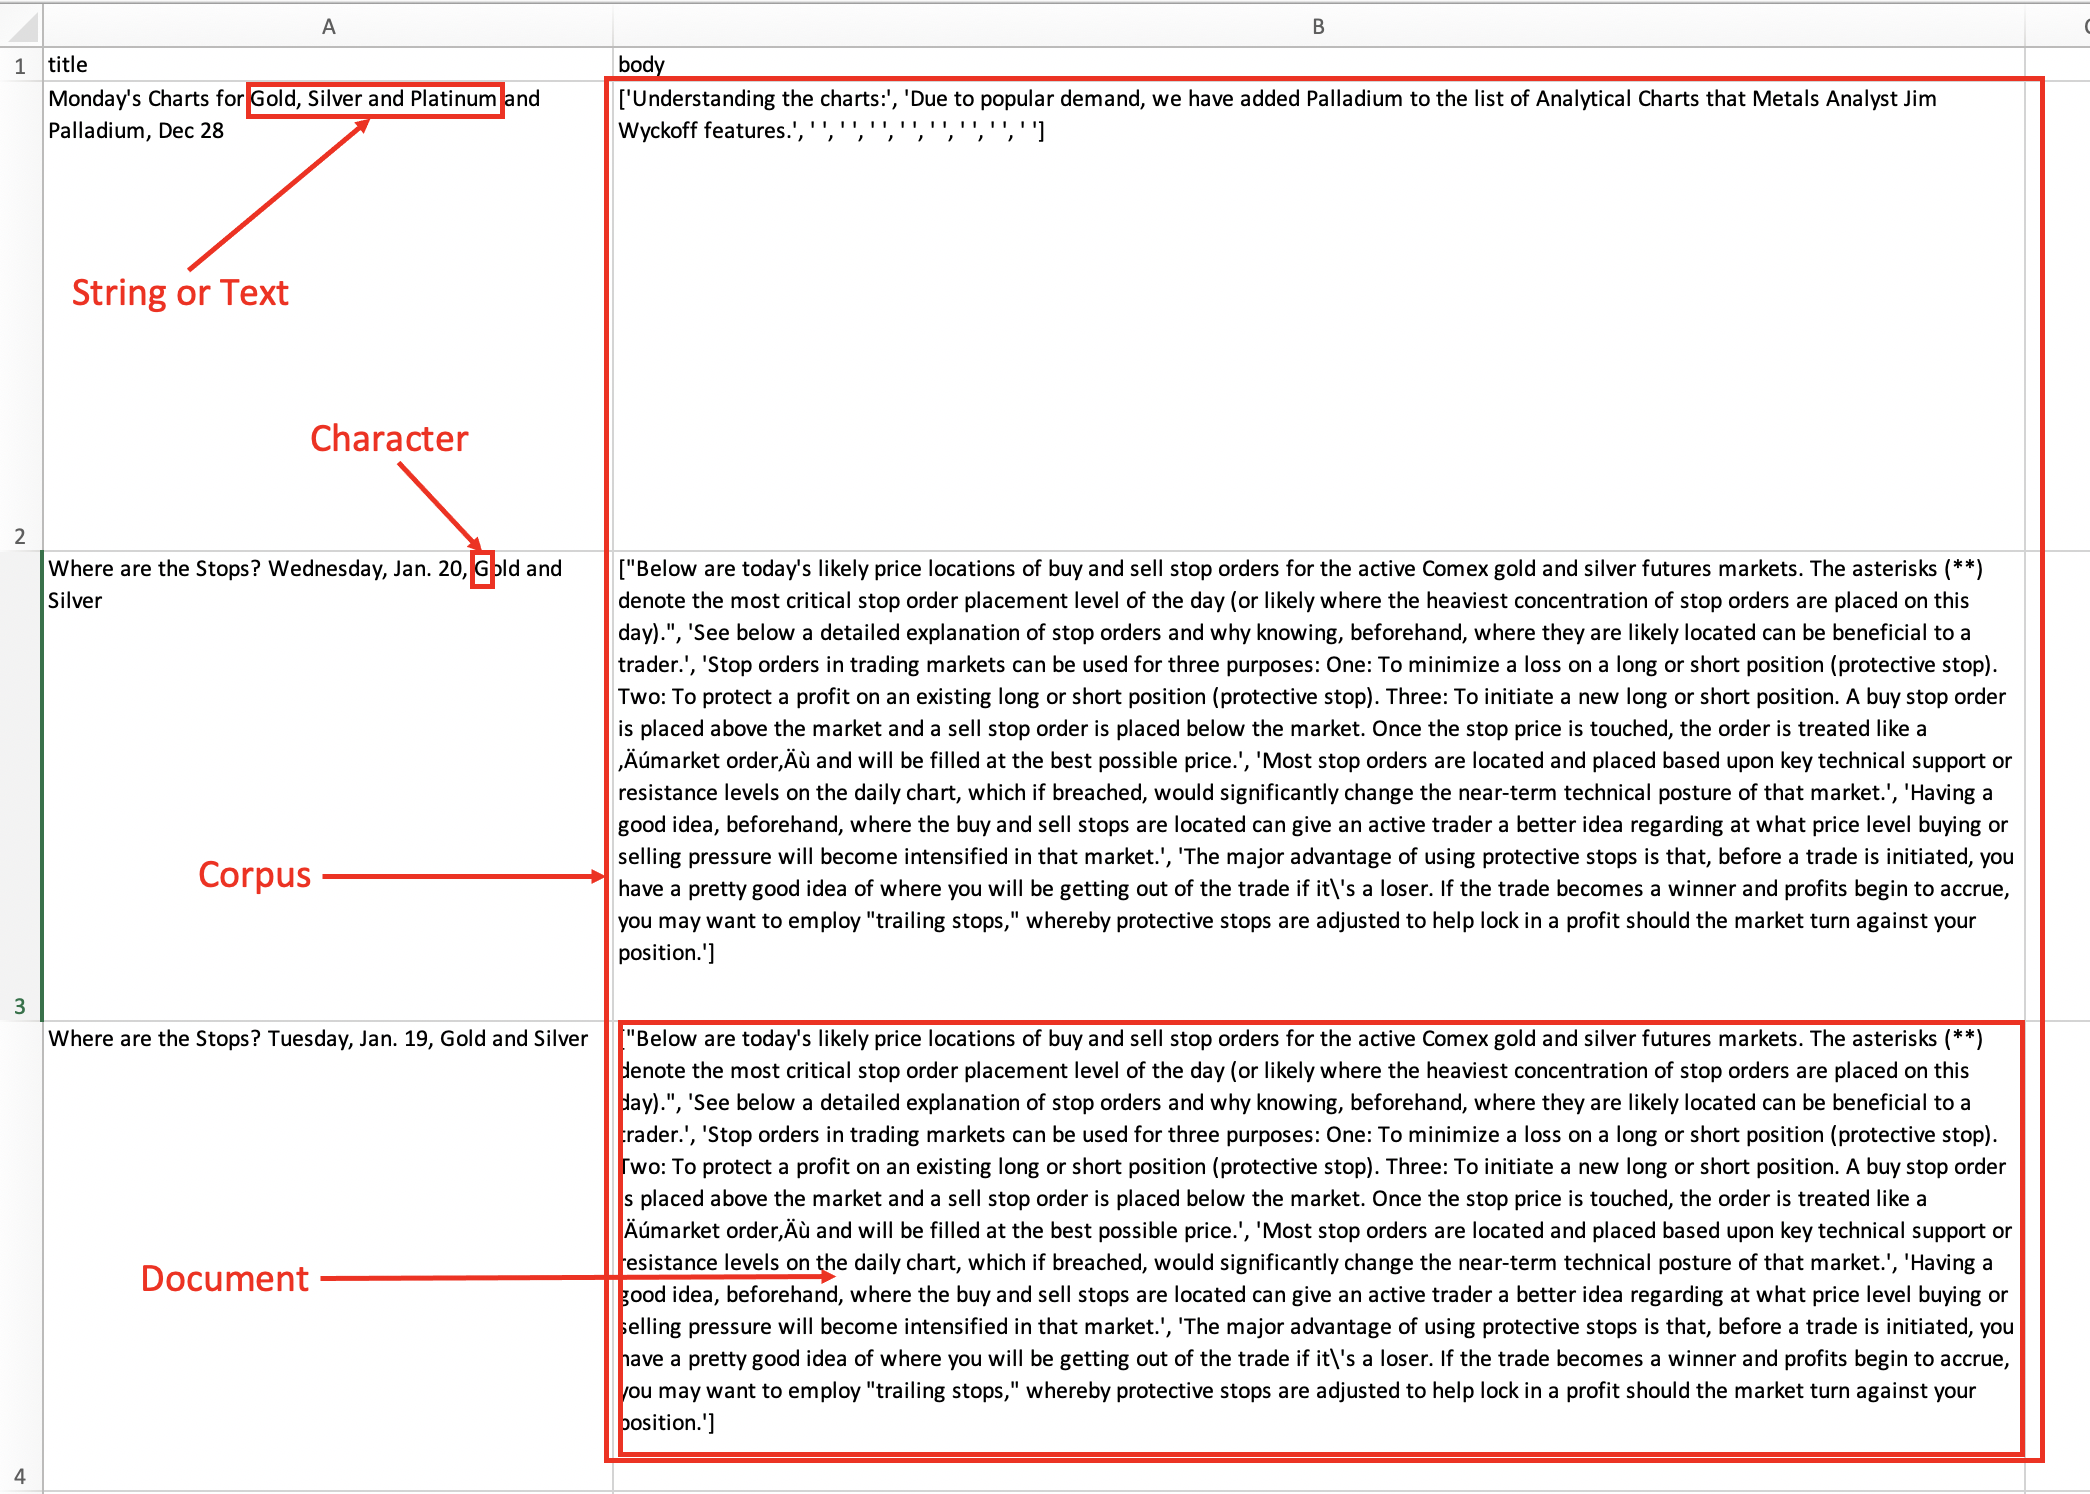

In [ ]:
display(df)

In [ ]:
# we will pick one of the rows as our example sentence for the following demonstrations.
example = df['Comment'].to_string()
type(example)

### Part 2a: Preprocessing
Preprocessing is often neccessary for text analytics tasks.  The process to clean is highly customizable and analysts will have to decide how much preprocessing is needed.  Preprorcessing tasks includes:
+ Case normalization
+ Tokenization
+ n-grams and skip-grams
+ Removing unwanted characters/numbers
+ Stemming and lemmatizing
+ Spell checking
+ Removing stop words
+ Removing common and rare words

*Due to limited time we have for this exercise, I will only be showing you a few popular preprocessing tasks.

#### Case normalization
- convert all characters to the best case
- you can do *case folding*, which is to make everything lower case
- but I prefer *true-casing*, which take the type of word into account
    - example: I Live in canada => i live in Canada
    
You will need the python library ***truecase***, execute the following line in your command line tool

```pip install truecase```

In [ ]:
import truecase
print(truecase.get_true_case('kyle lowry pLays fOr The torONto raptORS'))

In [ ]:
print(truecase.get_true_case(example))

#### Tokenization
Tokenization splits sentenzes into individual words (aka ***tokens***).  The common technique is to split on the whitespace and special charaters.

You will need the python library ***nltk***, execute the following line in your command line tool

```pip install nltk```


In [ ]:
import nltk
nltk.download('punkt') # you only need to run this line once on your computer and it will be saved to your computer.

from nltk.tokenize import word_tokenize

tokens = word_tokenize(example)
print(tokens)

#### n-grams
n-grams return sequences of *n* adjacent words.  It provides context around words for some models.

In [ ]:
from nltk.util import ngrams

#2-gram example:
grams = ngrams(tokens, 2)
for gram in grams:
        print(gram)

In [ ]:
#3-gram example:
grams = ngrams(tokens, 3)
for gram in grams:
        print(gram)

#### Removing unwanted characters and numbers
See can see that in your example_doc, it contains unwanted characters.  Unwanted characters are usually not helpful in NLP, so we will remove them.

Unwanted characters can also be:
+ Punctuation: ,.'":;!@#\%^&*()-_=+
+ Non-English characters: Ábcdêãçoàúü
+ Numbers: 55, 45.66, 1,555,444

The most common technique is to use ***Regular Expression***, however, we will not get into that rabbit hole today.  See [here](https://docs.python.org/3/howto/regex.html) for detail during your spare time.

Here is the general code to remove unwanted characters and you will need the library ***re***

***re*** should be a default library that comes with Python, so you shouldn't have to do ```pip install```

In [ ]:
import re

clean_example = re.sub(r"[\W\d]", " ", example)
clean_example

#### Removing Stop-words
Example of stop-words:
***a, an, and, are, as, at, be, but, by, for,
if, in, into, is, it, no, not, of, on, or,
such, that, the, their, then, there,
these, they, this, to, was, will, with***

Stopping is the process of removing common words.  Stopping helps remove noise and increase the efficiency in the later analytic process, you shall see!

In [ ]:
nltk.download("stopwords") # you only need to run this line once on your computer and it will be saved to your computer.
from nltk.corpus import stopwords

clean_tokens = nltk.word_tokenize(clean_example)
filtered_words = [word for word in clean_tokens if word not in stopwords.words('english')]
filtered_words
    

#### Stemming
Stemming reduces words to their root form.  
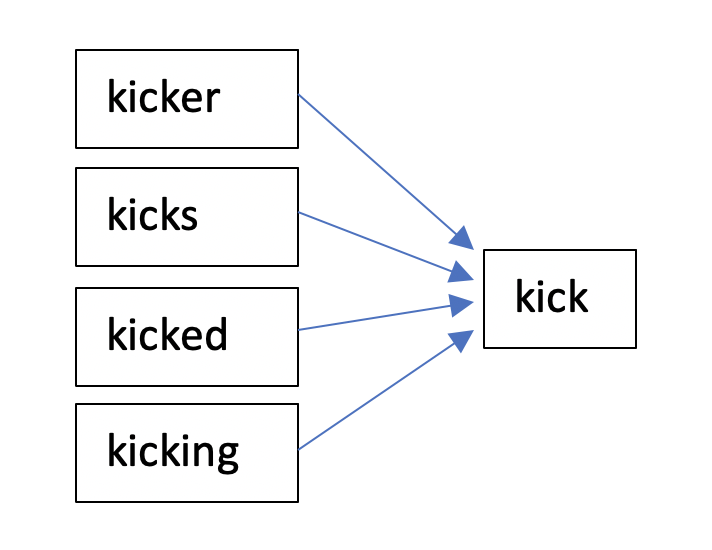

There are a few popular algorithms to choose from:
+ Porter (most gentle)
+ Snowball
+ Lancaster (most aggressive)

In [ ]:
nltk.download('wordnet') # you only need to run this line once on your computer and it will be saved to your computer.
from nltk.stem.porter import PorterStemmer
porter = [PorterStemmer().stem(word) for word in filtered_words]
porter

#### Lemmatization
Lemmatization is the advanced version of stemming, it takes part of speech (POS) into account.
For example, the word *meeting*:
+ get stemmed to *meet* as a verb
+ get stemmed to *meeting* as a noun

Compared to stemming, lemmatization is much slower, but performs more accurately.

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet = [WordNetLemmatizer().lemmatize(word) for word in filtered_words]
wordnet

In [ ]:
# Running it through preprocessing
import nltk
import truecase
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))

def preprocess(x):
    # Truecase
    x = truecase.get_true_case(x)
    
    # Remove unwanted characters
    x = re.sub(r"[\W\d]", " ", x)
    
    #Remove stopwards and lemmatize
    x = [WordNetLemmatizer().lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x)

df['clean'] = df['Comment'].apply(preprocess)
df['length'] = df['clean'].apply(len) # to add a new column for wordcount

display(df)


Yay~ now we have a list of normalized, tokenized, clean(without unwanted charaters), filtered(without stop words) and lemmatized list of words to work with!!  Please note that we only covered a few preproccessing techniques due to time limitation, feel free to explore other techniques and here is a free e-book for your reference [Speech and Language Processing by D. Jurafsky et al](https://web.stanford.edu/~jurafsky/slp3/ed3book.pdf).

### Part 2b: Applications
In the previous lecture, we learned that there are four main practice areas for Text Analytics.
+ Descriptive Statistics
+ Document Clustering
+ Document Clasification
+ Sentiment Analysis

We won't have time to go into each area, but let's first focus on the ones that can be easily applied first.

### Sentiment analysis
You will need the python library ***TextBlob***, execute the following line in your command line tool.
TextBlob is a convenient way to do sentiment analysis, but there are limitations.  Read more about TextBlob [here](https://textblob.readthedocs.io/en/dev/index.html) and [here](https://planspace.org/20150607-textblob_sentiment/).

```pip install textblob```

In [ ]:
from textblob import TextBlob

df['sentiment'] = df['clean'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
display(df)

### Descriptive Statistics
What are the most frequent words?  

You will need the python library ***yellowbrick***, execute the following line in your command line tool.
Yellowbrick is a visualizer for ML.  Read more about Yellowbrick [here](https://www.scikit-yb.org/en/latest/index.html).

```pip install yellowbrick```

#### Word frequency with N-grams

Machine Learning models cannot process text, we must first covert text into numbers.  This process of converting text into number is called ***vectorization***.

***Bag of words (BOW)*** is a very common vectorization method, it is also called term document matrix(TDM) and vector space model.  Text is broken down into individual unique words(aka. *term*) and has its own column.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

# default is 1-gram
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

### Let's try 2-grams
vectorizer = CountVectorizer(ngram_range=[2,2])
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()


#### Topic Modellng
Topic modeling is a statistical model for discovering abstract topics.  The goal is to automatically determin the main themes in a set of documents.  Topic Modeling is an unsupervised machine learning technique and there are many Topic Modeling algorithms.

The following code will demonstrate the most popular Topic Modeling algorithm, Latent Dirichlet Allocation(LDA).  

LDA is a generative statistical model that is based on probabilistic graphical models.  Learn more about the sklearn LDA library [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)

In [ ]:
import matplotlib.pyplot as plt
from time import time

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

n_samples = 2000
n_features = 1000 
n_components = 5 # number of topics
n_top_words = 8  # number of topic words

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


tf_vectorizer = CountVectorizer(max_features=n_features, ngram_range=[1,2])
dtm = tf_vectorizer.fit_transform(df['clean'])
tf_feature_names = tf_vectorizer.get_feature_names()

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)
t0 = time()
lda.fit(dtm)
print("done in %0.3fs." % (time() - t0))

plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

We kinda did it! I said kinda because we only had 12 articles in our corpus.  You will need a lot more documents to fully utilize LDA.  If you are really looking for challenges, try harvesting more text, ideal sources are social media platforms, e-commerce reveiws and forums etc.

If you want to develop a NLP algorithm that crawls the now infamous subreddit 'r/wallstreetbets', you can look into its API, [PRAW](https://praw.readthedocs.io/en/latest/getting_started/quick_start.html)

### Hints for your group presentation
If you don't want to code NLP, you can just use AWS services.  Don't forget you all have access to AWS and you can perform similar tasks with it.  Check out [AWS Comprehend](https://aws.amazon.com/comprehend/).